In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

$ \frac{x^2+3y-z}{\sin (4 \omega _0 x)} $

In [2]:
#https://datascience.stackexchange.com/questions/48693/perform-k-means-clustering-over-multiple-columns
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#https://datascience.stackexchange.com/questions/16700/confused-about-how-to-apply-kmeans-on-my-a-dataset-with-features-extracted

In [3]:
df = pd.read_csv('covid.csv',encoding='ISO-8859–1')

FileNotFoundError: [Errno 2] No such file or directory: 'covid.csv'

In [24]:
df.head()

,Country,Cases,Deaths,Recov,Arrival,Continent,Arrival_days,First_death,First_death_in_days
0,China,83500,4634,78451,12/31/2019,0,0,1/11/2020,11
1,Thailand,3162,58,3053,1/13/2020,1,13,3/1/2020,48
2,Japan,18390,971,16505,1/16/2020,1,16,2/26/2020,41
3,South Korea,1989,36,246,1/20/2020,1,20,2/20/2020,31
4,Taiwan,447,7,435,1/21/2020,1,21,2/16/2020,26


In [53]:
df.describe()

,Cases,Deaths,Recov,Continent,Arrival_days,First_death_in_days
count,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000
mean,5.778673e+04,2871.874286,28831.777143,2.971429,61.160000,22.965714
std,2.324709e+05,11916.497427,94042.825050,1.726829,19.234416,27.045066
min,1.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.265000e+02,13.500000,441.000000,1.000000,56.000000,9.000000
50%,4.242000e+03,86.000000,1816.000000,2.000000,64.000000,18.000000
75%,2.848550e+04,598.000000,12772.000000,4.000000,73.000000,28.000000
max,2.593169e+06,127693.000000,788904.000000,8.000000,121.000000,280.000000


In [25]:
#features = df.loc[:,['Cases','Deaths','Continent','Arrival_days','Death_Arrival']]

In [26]:
features = df.loc[:,['Continent','Arrival_days','First_death_in_days']]

In [27]:
features

,Continent,Arrival_days,First_death_in_days
0,0,0,11
1,1,13,48
2,1,16,41
3,1,20,31
4,1,21,26
...,...,...,...
170,4,92,12
171,4,93,5
172,4,96,40
173,1,101,19


In [28]:
data = features

In [29]:
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

In [30]:
data.head()

,Continent,Arrival_days,First_death_in_days,clusters
0,0,0,11,0
1,1,13,48,0
2,1,16,41,0
3,1,20,31,0
4,1,21,26,0


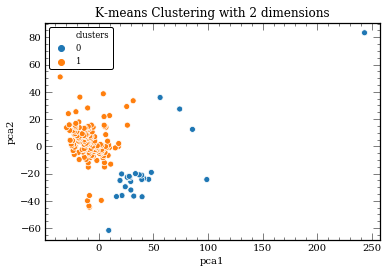

In [33]:
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

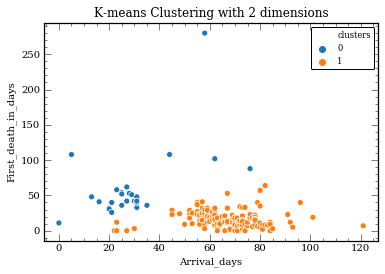

In [58]:
results = pd.DataFrame(data,columns=['Arrival_days','First_death_in_days'])
sns.scatterplot(x="Arrival_days", y="First_death_in_days", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

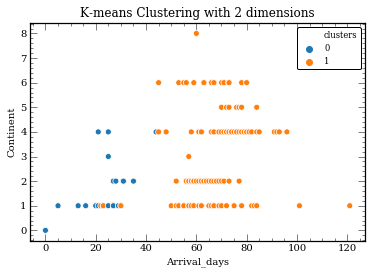

In [59]:
results = pd.DataFrame(data,columns=['Arrival_days','Continent'])
sns.scatterplot(x="Arrival_days", y="Continent", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

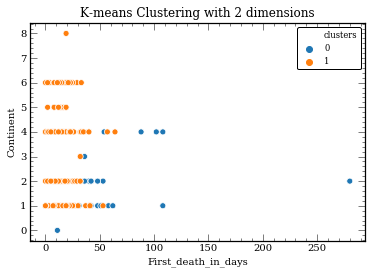

In [60]:
results = pd.DataFrame(data,columns=['First_death_in_days','Continent'])
sns.scatterplot(x="First_death_in_days", y="Continent", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)

In [35]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

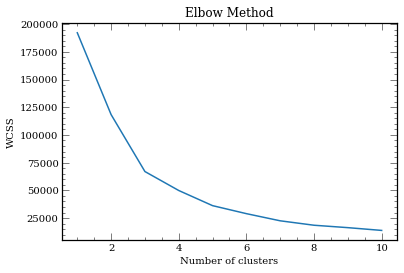

In [36]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
df.median()

Cases                  4242.0
Deaths                   86.0
Recov                  1816.0
Continent                 2.0
Arrival_days             64.0
First_death_in_days      18.0
dtype: float64

In [38]:
df.mode(axis=0)

,Country,Cases,Deaths,Recov,Arrival,Continent,Arrival_days,First_death,First_death_in_days
0,Afghanistan,141.0,0.0,0.0,3/13/2020,4.0,73.0,3/21/2020,0.0
1,Albania,859.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
170,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
corr1 = df.corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

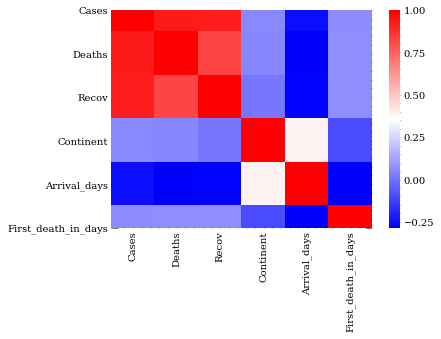

In [40]:
sns.heatmap(data = corr1, square = True, cmap = "bwr")
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

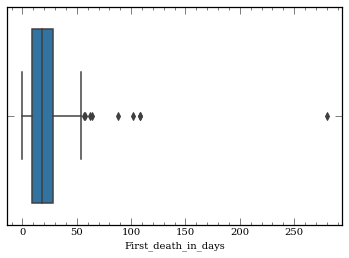

In [43]:
sns.boxplot(x=df['First_death_in_days'])

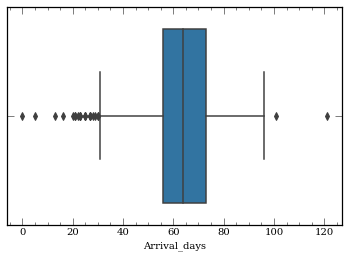

In [44]:
sns.boxplot(x=df['Arrival_days'])

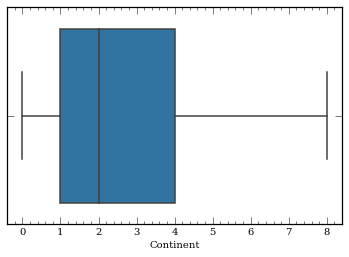

In [45]:
sns.boxplot(x=df['Continent'])

In [46]:
groupby1=df.groupby('Arrival_days').mean()['Cases']

In [48]:
groupby2=df.groupby('First_death_in_days').mean()['Cases']

In [49]:
group3=df.groupby('Continent').mean()['Cases']

(array([0., 1.]), array([-0.5,  0. ,  0.5]), <a list of 2 Patch objects>)

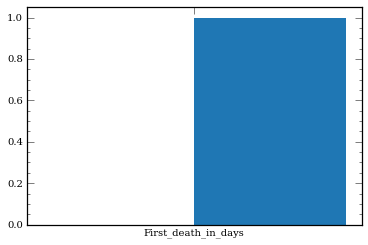

In [54]:
plt.hist(['First_death_in_days'], bins=2)

In [52]:
x = df.groupby('First_death_in_days')['SentenceId'].count()

KeyError: 'Column not found: SentenceId'